In [600]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (ggong@kasi.re.kr)
# @Date: 2023-10-06
# @Filename: hw3.ipynb

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys

In [601]:
class handling_txts:
    """handling the txt file"""

    def __init__(self, file_name: str):
        self.file_name = file_name
        self.file = open(file_name, 'r')
        #print(self.file_name)

    def rd_savetolist(self):

        self.value_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            val = float(line)
            self.value_list.append(val)

        return self.value_list

    def rd_savetolist_abc(self):

        self.first_list = []
        self.second_list = []
        self.third_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            item = line.split(" ")
            first_val = float(item[0])
            self.first_list.append(first_val)
            second_val = float(item[1])
            self.second_list.append(second_val)
            third_val = float(item[2])
            self.third_list.append(third_val)

        return self.first_list, self.second_list, self.third_list

    def rd_ln(self):

        list_len = len(self.value_list)
        return list_len


In [602]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis



In [603]:
# call the mock datas

mk_f = handling_txts("regression_data_f.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)


1.457882325642531


In [604]:
a_list = list(range(-10, 11))
b_list = list(range(-10, 11))
c_list = list(range(-10, 11))

In [605]:
def model1(a, b, x_list):
    model1 = []
    for x in x_list:
        if x == 0:
            model1_val = 1
        else:
            model1_val = (a*x)+(x**b)+1
        model1.append(model1_val)

    #print(f"model = {a}*x + x**{b} + 1")

    return model1

def model2(a, b, c, x_list):
    model2 = []
    for x in x_list:
        model2_val = a*np.tanh(x-b)+c
        model2.append(model2_val)

    return model2

def model3(a, b, x_list):
    model3 = []
    for x in x_list:
        model3_val = a*x*(np.sin(b))+1
        model3.append(model3_val)

    return model3

def model4(a, b, x_list):
    model4 = []
    for x in x_list:
        model4_val = a + b*(1+x)
        model4.append(model4_val)

    return model4

def model5(a, b, x_list):
    model5 = []
    for x in x_list:
        model5_val = np.sqrt(a*(1+x)**3+b)
        model5.append(model5_val)

    return model5


1.457882325642531
[17195.355031014293, 3507.9270316900047, 30123.848001965463, 11591.399449806268, 6196.797814369114, 45550.88799295276, 30042.612793147226, 70.7646578692722, 24863.791556197863, 20802.810848382534, 572.6705663411947, 36147.128397741726, 41444.931863981335, 2644.1037929472104, 16242.234622290427, 28064.7965627423, 1101.6249444982398, 23571.62357924071, 48164.906315737455, 11022.953716720718, 7275.069210407698, 14483.4578446537, 2612.0521024473483, 23697.276665077105, 8958.73087612335, 5357.496416388, 37791.90079625605, 25064.34078774264, 50.32651940043032, 19502.327254274842, 16268.58990507351, 572.6705663411947, 30078.47569949679, 34425.353531279965, 2366.3317409705733, 12644.00043397152, 22054.41850906662, 771.8408335042119, 19740.93259261435, 39934.22914747189, 9375.576118974986, 5555.200606107768, 12004.811489380503, 1850.0325693619757, 18042.139460038972, 6666.239121404086, 4579.725834668734, 30757.61703378945, 20537.463845165603, 45.58365411292933, 14792.496775226

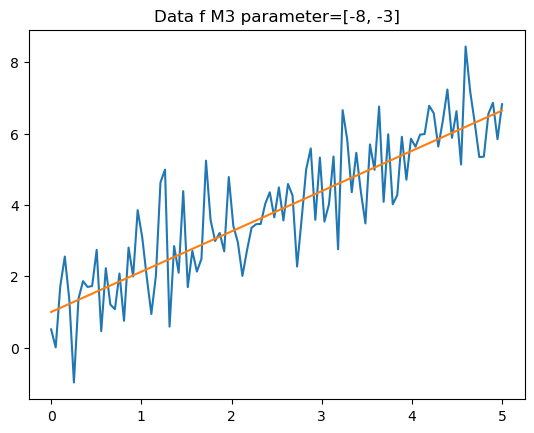

In [606]:

mk_f = handling_txts("regression_data_f.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        model = model3(a, b, data_f_x)
        abc = [a, b]
        abc_list.append(abc)
        models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M1 a = {fin_model[0]}, b={fin_model[1]} , Minimum value of chi^2 = {Minimumvalueofchi2}")

plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data f M3 parameter={fin_model}")
plt.show()

1.457882325642531
[17949.682179253585, 3129.5071114185507, 29061.567011429113, 10922.882101465508, 6637.644343983883, 46796.75460298436, 31049.023936661968, 13.39903954366583, 23896.35932968651, 19915.73320991883, 682.491074481692, 37253.8470524864, 42632.00510677368, 2921.1104275538105, 15455.464495056685, 27038.570968991728, 880.4194311644653, 24459.78194386246, 49446.82832255479, 11621.014653273163, 6740.3830784493975, 15173.334328883117, 2282.4562250170907, 22752.205824408444, 8368.04731343072, 5765.240343855339, 38924.16279609851, 25981.092867719955, 9.679513721434343, 18642.620301228675, 15481.202081270236, 682.491074481692, 31085.504539581052, 35504.70150060711, 2626.619762930564, 11946.889370275196, 21141.797525505146, 583.7379223178646, 20551.257171587982, 41098.94100442157, 9924.813012686242, 5084.965138159343, 12630.237309600041, 1569.2607347729129, 17214.278769237986, 6153.389344359575, 4954.367159988648, 31776.274423442796, 21364.556861605488, 21.65526108054376, 14040.5150

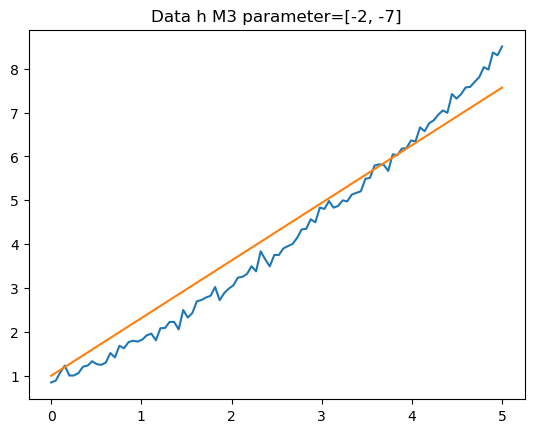

In [607]:

mk_f = handling_txts("regression_data_h.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        model = model3(a, b, data_f_x)
        abc = [a, b]
        abc_list.append(abc)
        models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]} , Minimum value of chi^2 = {Minimumvalueofchi2}")

plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data h M3 parameter={fin_model}")
plt.show()

In [608]:

mk_f = handling_txts("regression_data_h.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        for c in c_list:
            model = model2(a, b, c, data_f_x)
            abc = [a, b, c]
            abc_list.append(abc)
            models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]}, c={fin_model[2]} Minimum value of chi^2 = {Minimumvalueofchi2}")

1.457882325642531
[27543.17345405093, 25323.103241721776, 23197.132039293618, 21165.259846766465, 19227.48666414029, 17383.81249141511, 15634.237328590907, 13978.761175667714, 12417.384032645503, 10950.105899524278, 9576.926776304046, 8297.846662984806, 7112.865559566553, 6021.983466049291, 5025.2003824330195, 4122.516308717739, 3313.9312449034464, 2599.445190990145, 1979.0581469778338, 1452.7701128665133, 1020.5810886561826, 27543.173399020674, 25323.103189270994, 23197.131989422305, 21165.2597994746, 19227.48661942789, 17383.812449282166, 15634.237289037435, 13978.761138693686, 12417.383998250943, 10950.105867709188, 9576.926747068412, 8297.846636328628, 7112.865535489838, 6021.983444552038, 5025.200363515225, 4122.516292379405, 3313.931231144576, 2599.445179810736, 1979.0581383778854, 1452.7701068460237, 1020.5810852151545, 27543.172992399166, 25323.102801709254, 23197.131620920347, 21165.259450032416, 19227.486289045482, 17383.81213795954, 15634.236996774596, 13978.760865490633, 12

1.457882325642531
[-1, 4]
M a = -1, b=4 , Minimum value of chi^2 = 20.160123420276676


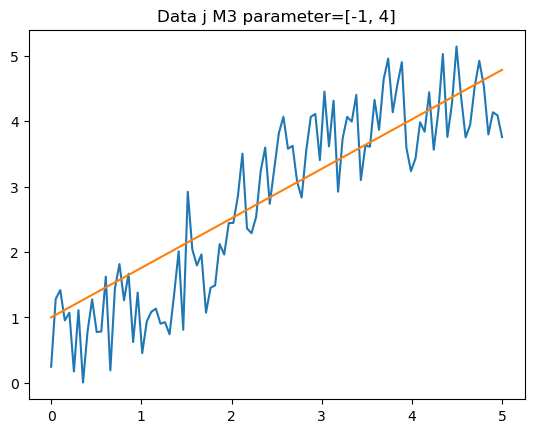

In [609]:

mk_f = handling_txts("regression_data_j.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        model = model3(a, b, data_f_x)
        abc = [a, b]
        abc_list.append(abc)
        models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

#print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]} , Minimum value of chi^2 = {Minimumvalueofchi2}")

plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data j M3 parameter={fin_model}")
plt.show()

In [610]:

mk_f = handling_txts("regression_data_j.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        for c in c_list:
            model = model2(a, b, c, data_f_x)
            abc = [a, b, c]
            abc_list.append(abc)
            models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]}, c={fin_model[2]} Minimum value of chi^2 = {Minimumvalueofchi2}")

1.457882325642531
[24506.594160975354, 22410.213938679248, 20407.93272628414, 18499.75052379001, 16685.66733119687, 14965.683148504724, 13339.797975713564, 11808.011812823395, 10370.324659834212, 9026.736516746034, 7777.247383558835, 6621.857260272628, 5560.566146887411, 4593.374043403182, 3720.2809498199467, 2941.2868661377, 2256.3917923564436, 1665.5957284761769, 1168.8986744969002, 766.3006304186138, 457.8015962413179, 24506.594106833854, 22410.213887117217, 20407.93267730155, 18499.75047738689, 16685.667287373217, 14965.683107260518, 13339.797937048832, 11808.011776738114, 10370.324626328398, 9026.736485819676, 7777.247355211935, 6621.857234505191, 5560.566123699435, 4593.3740227946655, 3720.2809317908936, 2941.286850688106, 2256.39177948631, 1665.5957181855047, 1168.8986667856893, 766.3006252868631, 457.801593689028, 24506.593706779266, 22410.213506122407, 20407.932315366525, 18499.75013451164, 16685.666963557742, 14965.682802504823, 13339.79765135291, 11808.01151010198, 10370.324

1.457882325642531
[-10, 0]
M a = -10, b=0 , Minimum value of chi^2 = 126.66477069304416


C:\Users\mming\AppData\Local\Temp\ipykernel_9688\2571719477.py:41: RuntimeWarning: invalid value encountered in sqrt
  model5_val = np.sqrt(a*(1+x)**3+b)


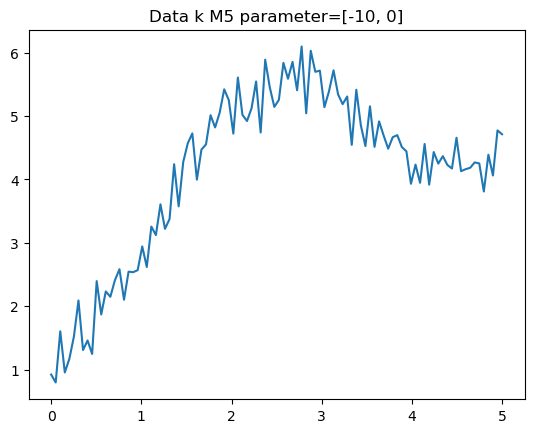

In [611]:

mk_f = handling_txts("regression_data_k.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        model = model5(a, b, data_f_x)
        abc = [a, b]
        abc_list.append(abc)
        models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

#print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]} , Minimum value of chi^2 = {Minimumvalueofchi2}")
plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data k M5 parameter={fin_model}")
plt.show()

1.457882325642531
[27417.11745849438, 25196.1648945297, 23069.311340466, 21036.55679630329, 19097.901262041585, 17253.344737680858, 15502.887223221116, 13846.52871866238, 12284.269224004625, 10816.10873924786, 9442.04726439208, 8162.084799437301, 6976.221344383507, 5884.456899230705, 4886.791463978888, 3983.225038628066, 3173.757623178234, 2458.3892176293903, 1837.1198219815356, 1309.949436234674, 876.8780603888006, 27417.11740214621, 25196.164840761, 23069.311289276775, 21036.55674769351, 19097.901216011265, 17253.344694230003, 15502.887182349728, 13846.528680370446, 12284.26918829215, 10816.10870611485, 9442.047233838533, 8162.084771463212, 6976.221318988879, 5884.456876415533, 4886.791443743184, 3983.22502097182, 3173.7576081014477, 2458.3892051320645, 1837.1198120636725, 1309.9494288962703, 876.8780556298587, 27417.11698578655, 25196.16444346111, 23069.310911036657, 21036.556388513185, 19097.90087589072, 17253.34437316923, 15502.886880348742, 13846.528397429242, 12284.268924410722,

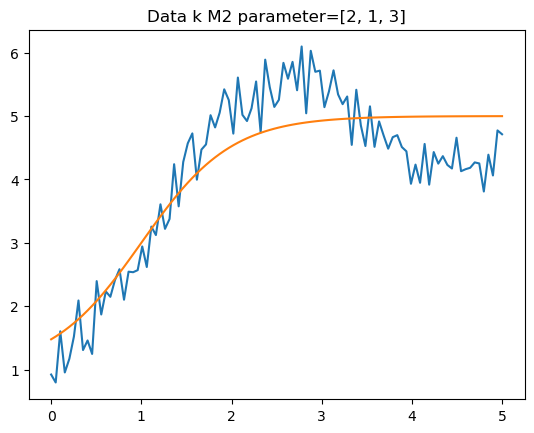

In [612]:

mk_f = handling_txts("regression_data_k.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        for c in c_list:
            model = model2(a, b, c, data_f_x)
            abc = [a, b, c]
            abc_list.append(abc)
            models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]}, c={fin_model[2]} Minimum value of chi^2 = {Minimumvalueofchi2}")

plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data k M2 parameter={fin_model}")
plt.show()

1.457882325642531
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

C:\Users\mming\AppData\Local\Temp\ipykernel_9688\2571719477.py:41: RuntimeWarning: invalid value encountered in sqrt
  model5_val = np.sqrt(a*(1+x)**3+b)


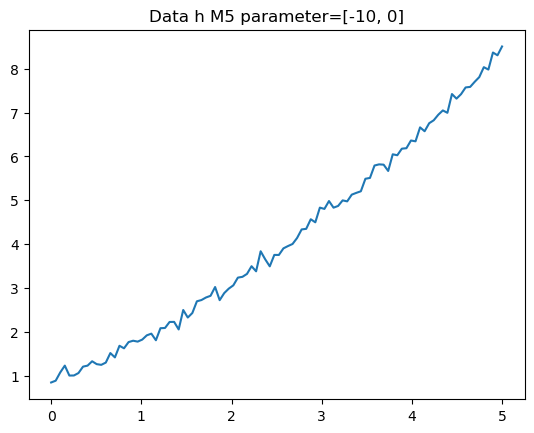

In [613]:

mk_f = handling_txts("regression_data_h.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        model = model5(a, b, data_f_x)
        abc = [a, b]
        abc_list.append(abc)
        models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]} , Minimum value of chi^2 = {Minimumvalueofchi2}")

print(models[index])
plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data h M5 parameter={fin_model}")
plt.show()

1.457882325642531
[27543.17345405093, 25323.103241721776, 23197.132039293618, 21165.259846766465, 19227.48666414029, 17383.81249141511, 15634.237328590907, 13978.761175667714, 12417.384032645503, 10950.105899524278, 9576.926776304046, 8297.846662984806, 7112.865559566553, 6021.983466049291, 5025.2003824330195, 4122.516308717739, 3313.9312449034464, 2599.445190990145, 1979.0581469778338, 1452.7701128665133, 1020.5810886561826, 27543.173399020674, 25323.103189270994, 23197.131989422305, 21165.2597994746, 19227.48661942789, 17383.812449282166, 15634.237289037435, 13978.761138693686, 12417.383998250943, 10950.105867709188, 9576.926747068412, 8297.846636328628, 7112.865535489838, 6021.983444552038, 5025.200363515225, 4122.516292379405, 3313.931231144576, 2599.445179810736, 1979.0581383778854, 1452.7701068460237, 1020.5810852151545, 27543.172992399166, 25323.102801709254, 23197.131620920347, 21165.259450032416, 19227.486289045482, 17383.81213795954, 15634.236996774596, 13978.760865490633, 12

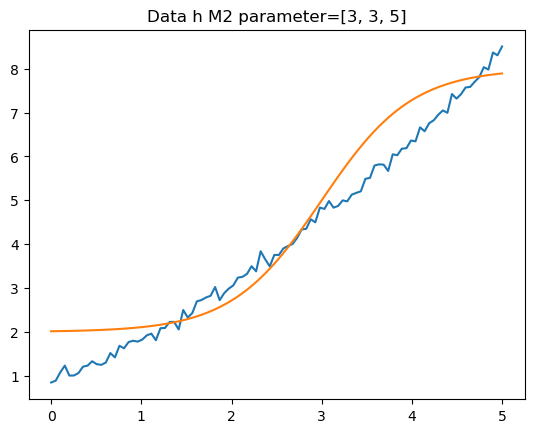

In [614]:

mk_f = handling_txts("regression_data_h.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()
print(x_sigma)

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        for c in c_list:
            model = model2(a, b, c, data_f_x)
            abc = [a, b, c]
            abc_list.append(abc)
            models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M a = {fin_model[0]}, b={fin_model[1]}, c={fin_model[2]} Minimum value of chi^2 = {Minimumvalueofchi2}")

plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data h M2 parameter={fin_model}")
plt.show()

In [615]:
k = 100

import scipy.special as sp

def pdf_chi(k, x):
    
    if x > 0:
        func = (x**((k/2)-1)*math.exp(-x/2))/(2**(k/2)*sp.gamma(k/2))
    else:
        func = 0

    return func

chi_pdf =  []
for x in data_f_x:
    val = pdf_chi(k, x)
    chi_pdf.append(val)



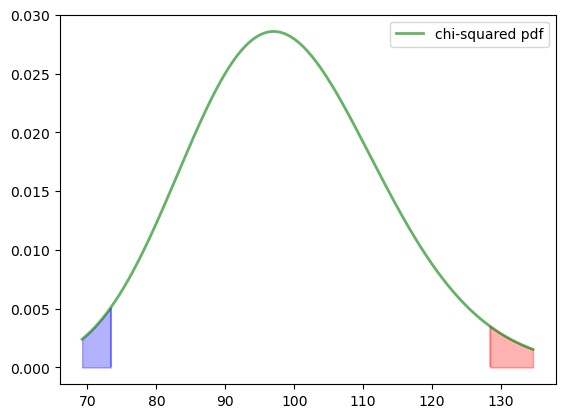

In [616]:
from scipy.stats import chi2
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# 카이제곱분포(χ2-분포)를 활용한 검정
# https://direction-f.tistory.com/34

## 모집단 평균 70, 표준편차 3 가정
mk_f = handling_txts("regression_data_h.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_mean= mk_f_cal.mean()
x_sigma = mk_f_cal.StandardDeviation()
mu = x_mean
std = x_sigma
norm_ = norm(mu,std)

## 카이제곱분포를 활용한 신뢰구간 추정
df = 100-1
chi_ = chi2(df)
t_025 = chi_.ppf(0.025)
t_975 = chi_.ppf(0.975)

##시각화
x = np.linspace(chi_.ppf(0.01), chi_.ppf(0.99), 1000)
t_025_ = np.linspace(chi_.ppf(0.01), t_025,1000)
t_975_ = np.linspace(t_975, chi_.ppf(0.99),1000)

plt.vlines(t_025, 0, chi_.pdf(t_025), colors="b", alpha=0.3)
plt.vlines(t_975, 0, chi_.pdf(t_975), colors="r", alpha=0.3)
plt.plot(x, chi_.pdf(x),'g-', lw=2, alpha=0.6, label='chi-squared pdf')
plt.fill_between(t_025_, 0,chi_.pdf(t_025_), color ="b", alpha=0.3)
plt.fill_between(t_975_, 0,chi_.pdf(t_975_), color ="r", alpha=0.3)
plt.legend()
plt.show()